#### Import all needed Libraries

In [32]:
# Importing Python Modules/Packages
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Loading King County dataset into a DataFrame

In [34]:
df = pd.read_csv('kc_house_data.csv')

In [35]:
## Pre-process the Dataset

In [36]:
# Checking the type of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
## We can see the date is in object format, so change it to date format

In [38]:
#Changing the date format
df.date = pd.to_datetime(df.date)

# Now re-run and check the datatype of a date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [39]:
## Now the datatype of date has been changed to datetime

In [40]:
# Checking for null values in the dataset. If we have any null values we should replace them with 0

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [41]:
## We can see that there are no null values in the dataset.

Perform Exploratory Data Analysis on the Data

In [42]:
df.shape

(21613, 21)

The dataset has a total of 21 columns and 21613 records.

In [43]:
# Retrieving the first five records from the data set
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [44]:
# Retrieve the summary statistics of the numeric variables of a given data set
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [45]:
df.sort_values('price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


 The min price and max price of the houses i.e, 75,000 and 7,700,000

Data Visualization for the Dataset

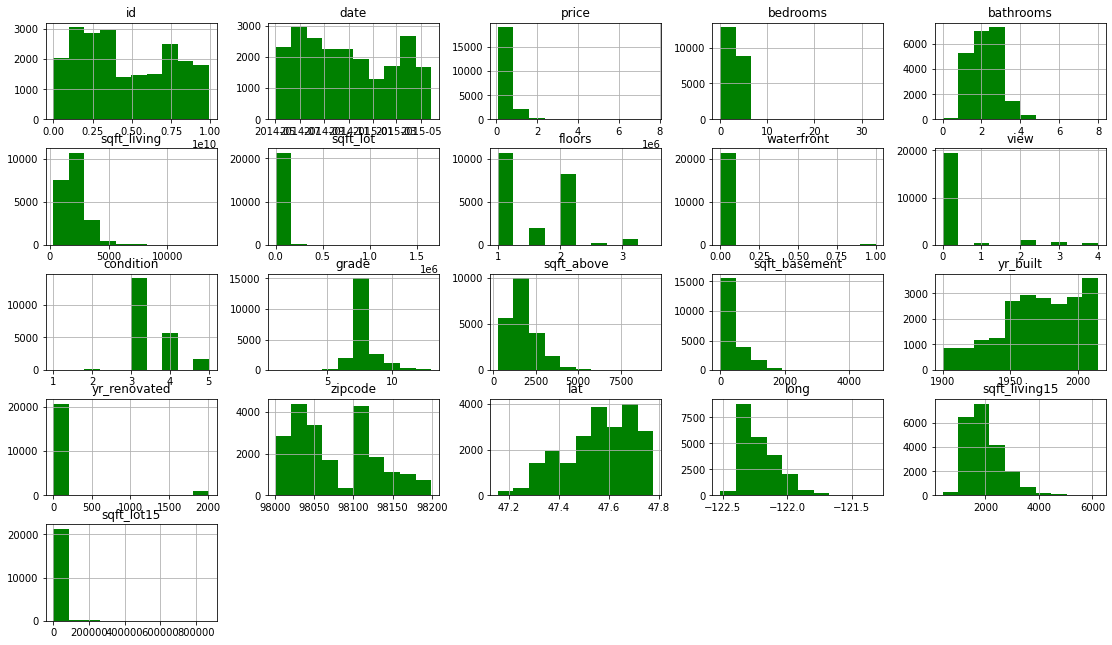

In [46]:
# Histogram for each numeric
df.hist(figsize=(19,11), color="green")
plt.show()

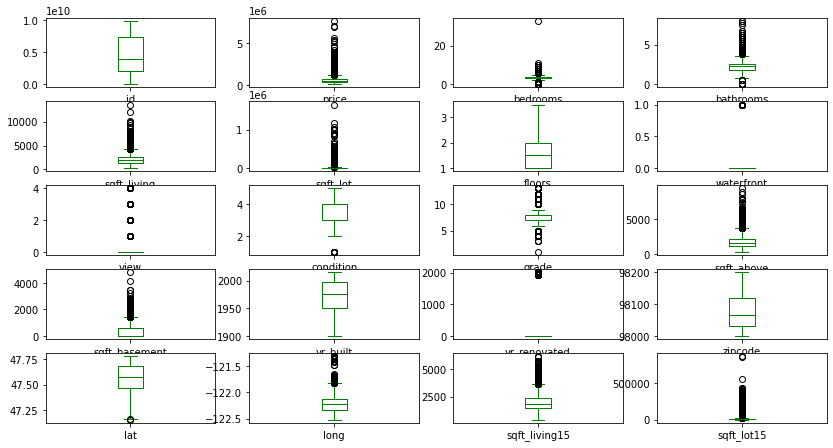

In [47]:
# Boxplots
df.plot(kind='box', subplots=True, layout=(6, 4),sharex=False, figsize=(14,9), color='green')
plt.show()

We can see some major outliers in number of bedrooms and bathrooms. We can make an assumption that a residential house will have atleast 1 bedroom and 1 bathroom. And also we can see there are 33 bedrooms in one house, so may be that is a Motel/commercial property. Delete all such records from the datset

In [48]:
# Delete records with 0 bedrooms and bathrooms
df = df[df.bedrooms > 0]
df = df[df.bathrooms > 0]

# Delete the record with 33 bedrooms
df = df[df.bedrooms < 33]
df.shape

(21596, 21)

The datset has 21,596 records after removing the records. So we are still left with enough observations to develop a prediction model


##### Target Variable : Housing Price distribution

<AxesSubplot:xlabel='price', ylabel='Density'>

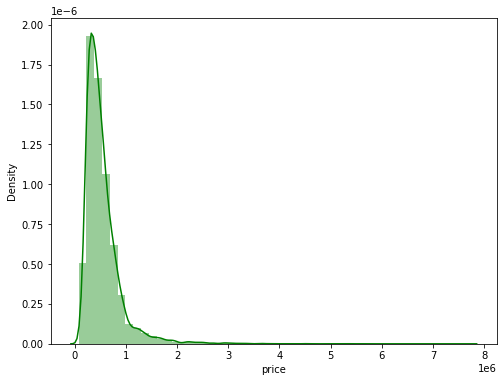

In [49]:
plt.figure(figsize = (8,6))
sns.distplot(df['price'], color='green')

We can see that most of the houses are within a million dollars, and there are very less number of houses that are more than 2 million

Relation between Price and other Categorical variables

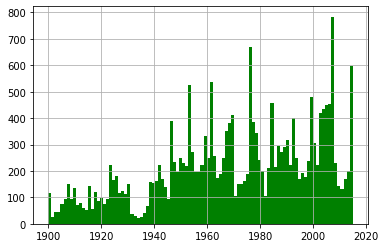

In [50]:
# Price of house and Year_built
df['yr_built'].hist(bins = 100, color='green')
plt.show()

The houses built after 2000 are more expensive, perhaps because of the realestate boom and the dips in between are may be due to recession.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

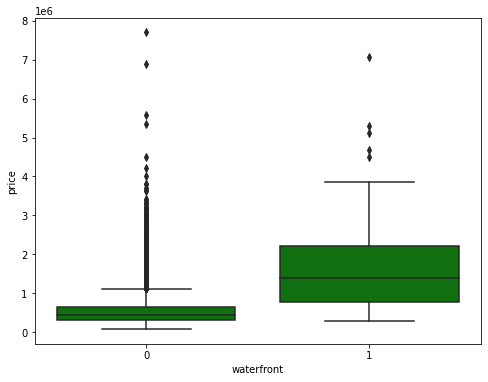

In [51]:
# Price and Waterfront
plt.figure(figsize = (8,6))
sns.boxplot(x='waterfront', y='price', data=df, color='green')

Waterfront Property comes at a premium

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

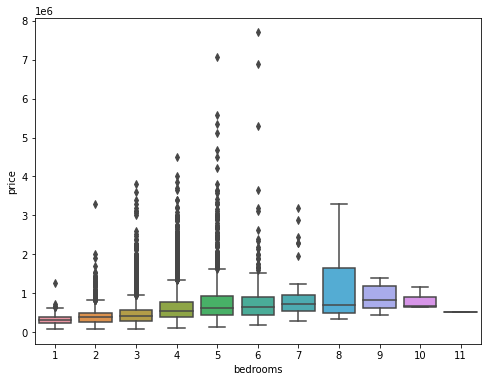

In [52]:
# Price and Number of berdooms
plt.figure(figsize = (8,6))
sns.boxplot(x='bedrooms', y='price', data=df)

There is increase in price with the increase in number of bedrooms

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

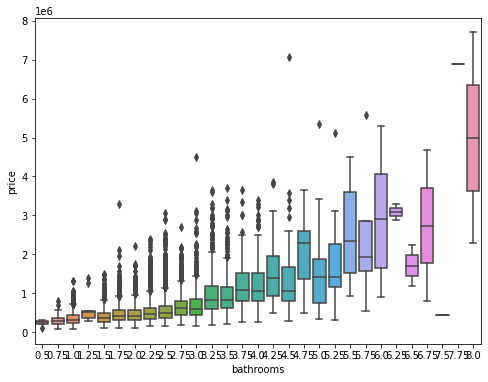

In [53]:
# Price and Number of bathrooms
plt.figure(figsize = (8,6))
sns.boxplot(x='bathrooms', y='price', data=df)

there are more number of bathrooms, the house price increases

<AxesSubplot:xlabel='floors', ylabel='price'>

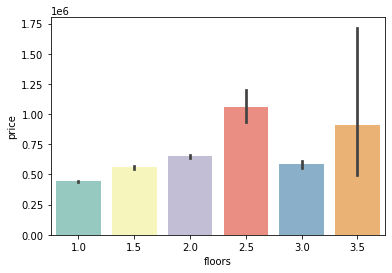

In [54]:
# Price and Number of Floors
sns.barplot(x ='floors', y='price', data = df, palette= 'Set3' )

Houses with 2.5 floors are more expensive

<AxesSubplot:xlabel='grade', ylabel='price'>

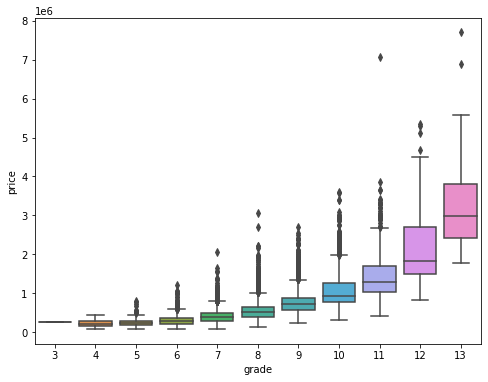

In [55]:
# Price and Grade
plt.figure(figsize = (8,6))
sns.boxplot(x='grade', y='price', data=df)

As we can view the good construction quality/grade, the house price increases

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

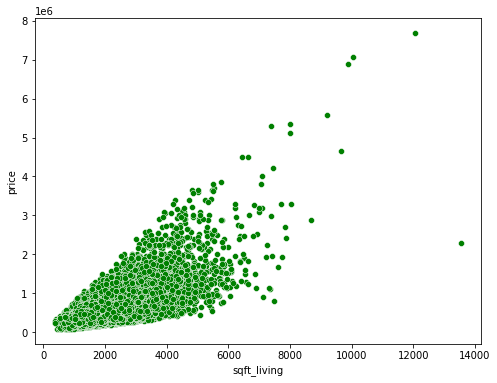

In [56]:
# Price and Sqft_living area
plt.figure(figsize =(8,6))
sns.scatterplot(x ='sqft_living', y = 'price', data = df, color='green')

The price increases with increse in size of living area. We can see some outliers. For example, there is one house with living area of almost 14,000 sqft for less price (220,000). This may be because the property is in the country area ad not in the city

<AxesSubplot:xlabel='long', ylabel='lat'>

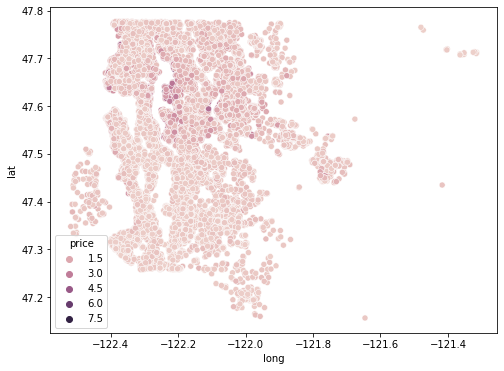

In [57]:
plt.figure(figsize =(8,6))
sns.scatterplot(x ='long', y = 'lat', data = df, hue ='price')

<AxesSubplot:>

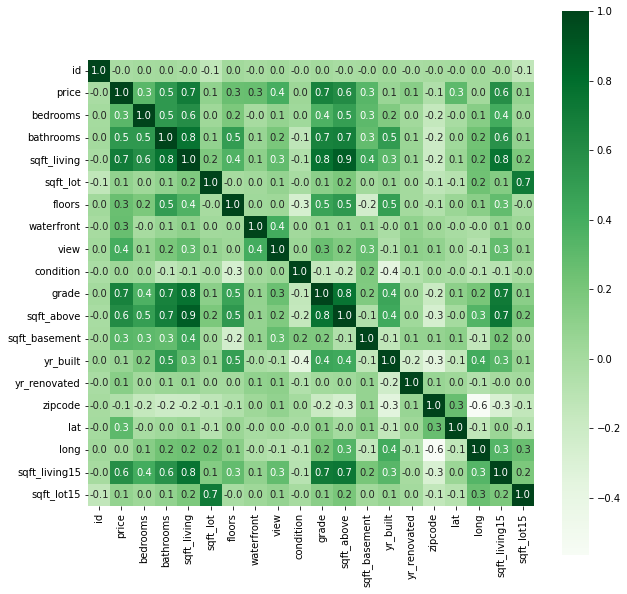

In [58]:
# Correlation matrix
corr  = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Greens')

#### Feature Engineering : Creating new Features

1.Split the Date sold column into month_sold and year_sold. This way we can understand if there are more sales in any particular month of the year

In [59]:
# Convert the Date column into month_sold and year_sold. 

df['month_sold'] = df['date'].apply(lambda x:x.month)
df['year_sold'] = df['date'].apply(lambda x:x.year)


#Drop original Date column
df.drop(columns=['date'], axis=1, inplace=True)

2. Convert the Year built column into 'Age' column that allows better interpretation. For this, we subtracted the actual year built from the latest built year in the dataset('2015') to calculate age of the house.

In [60]:
# calculate age of the house as of 2015
df['age'] = 2015 - df.yr_built

# Drp the original column 'yr_built'
df = df.drop(columns=['yr_built'], axis=1)

3. Change the year renovated column into a binary column - '1' for the homes that are renovated within past 10 years or built within the past 5 years(so they dont need renovation yet), and '0' for homes that are not renovated within past 10 years

In [61]:
#Fill missing values
df.yr_renovated.fillna(0.0, inplace=True)

#Create renovated column
df['renovated'] = df.year_sold - df.yr_renovated

#Replace any values less than 10 with 1, and any values over 10 with 0
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)

#Drop yr_renovated column
df.drop(columns=['yr_renovated'], axis=1, inplace=True)

4. Seattle is an important city in King county, where a lot of houses are listed. So for better analysis, calculate distance of the house from specific latitude and longitude points ( Seattle downtown). This can be done using geopy module in python

In [63]:
from geopy import distance
lat_long = df['lat'].astype(str) + ',' + df['long'].astype(str)
lat_long = list(map(eval, lat_long))

Seattle = (47.6062, -122.3321)
miles = []
for i in lat_long:
    miles.append(round(distance.distance(i, Seattle).miles, 1))
    
df['distance'] = miles

In [64]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'year_sold', 'age', 'renovated',
       'distance'],
      dtype='object')

Correlation matrix

<AxesSubplot:>

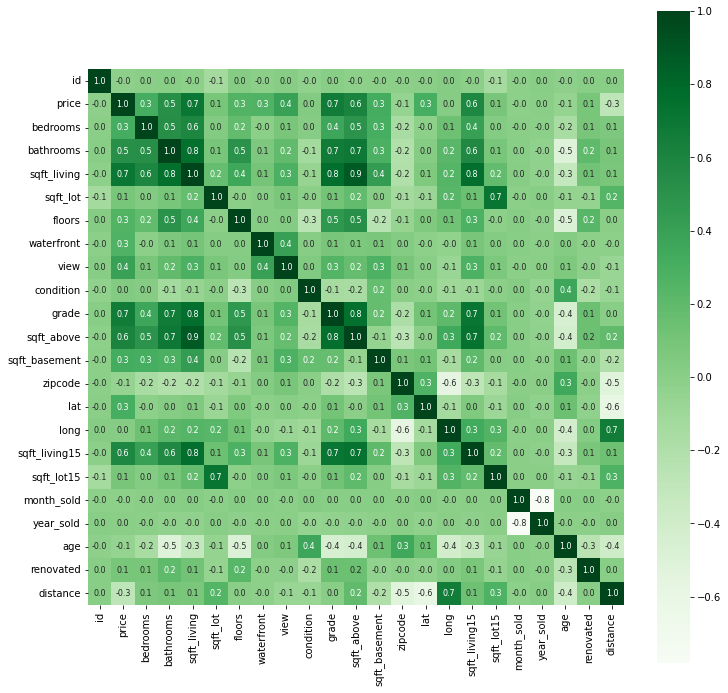

In [66]:
# Correlation matrix
corr  = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Greens')

#### Feature Selection

By looking at the correlation matrix we can understand which features are important and influence the house price


In [67]:
# Drop all unnecessary features
dCol = ['id','zipcode','month_sold','year_sold','lat','long','condition']
df.drop(dCol, axis = 1, inplace = True)

df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'age', 'renovated', 'distance'],
      dtype='object')

In [68]:
# Now we have 16 features
df.shape

(21596, 16)

Separate the dataset into Input and Output arrays

In [69]:
X = df.drop(['price'], axis = 1)
Y = df['price']

Split Input/Output arrays into Training/Testing Datasets

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=20)

Build and Train the model

In [72]:
model = LinearRegression()
#model = RandomForestRegressor()
#model = DecisionTreeRegressor()
model.fit(X_train,Y_train)

LinearRegression()

Medel Prediction on Trained data

In [74]:
Y_predict = model.predict(X_train)

#### Model Evaluation

In [75]:
# Model Evaluation

print('R^2:',metrics.r2_score(Y_train,Y_predict))
print('MAE:', metrics.mean_absolute_error(Y_train,Y_predict))
print('MSE:', metrics.mean_squared_error(Y_train,Y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_train,Y_predict)))

R^2: 0.7085481351384417
MAE: 127748.50571488231
MSE: 40239112611.98932
RMSE: 200596.8908333061


Visualizing the differences between actual and predicted values

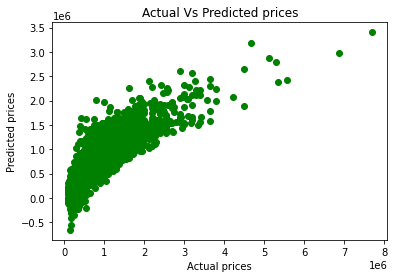

In [77]:
plt.scatter(Y_train,Y_predict, color='green')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Vs Predicted prices")
plt.show()

Inspecting residuals

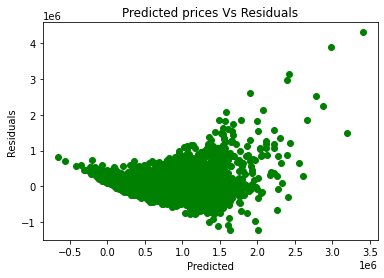

In [78]:
# Checking residuals
plt.scatter(Y_predict, Y_train-Y_predict, color='green')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted prices Vs Residuals")
plt.show()


Checking Normality of Errors

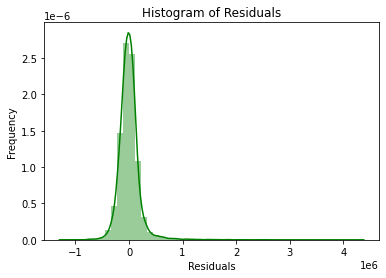

In [79]:
sns.distplot(Y_train-Y_predict, color='green')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()



##### Model Evaluation

In [80]:
# Predicting test data with model
Y_test_predict = model.predict(X_test)

In [81]:
# Model Evaluation
act_model = metrics.r2_score(Y_test, Y_test_predict)
                            
print('R^2:', act_model) 
print('MAE:', metrics.mean_absolute_error(Y_test, Y_test_predict))
print('MSE:', metrics.mean_squared_error(Y_test, Y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_test_predict)))

R^2: 0.7111081828873791
MAE: 124755.49161087959
MSE: 36728240445.75293
RMSE: 191646.13339630133


Let's make a Prediction using the Linaer model

In [82]:
# Predict the house price in dollars  
# Arbitrary predictors/housing records are used
model.predict([[4,3,3400,7000,2,1,4,3,3000,400,2800,6000,5,0,5.5]])

array([1196974.91036818])

##### The Predicted value of the house with the above features is $1,196,975